## OpenPIV tutorial 2

In this notebook we compare the time to run the same analysis using Cython (precompiled) version
with the Python process using FFT and/or direct cross-correlation method

In [1]:
from openpiv import tools, pyprocess, scaling, validation, filters
import numpy as np
import pylab
%matplotlib inline

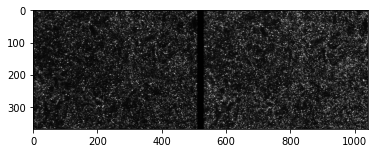

In [2]:
frame_a  = tools.imread( '../test1/exp1_001_a.bmp' )
frame_b  = tools.imread( '../test1/exp1_001_b.bmp' )
pylab.imshow(np.c_[frame_a,np.ones((frame_a.shape[0],20)),frame_b],cmap=pylab.cm.gray)

In [3]:
%%time
u, v, sig2noise = pyprocess.extended_search_area_piv( frame_a.astype(np.int32), frame_b.astype(np.int32), window_size=24, overlap=12, dt=0.02, search_area_size=64, sig2noise_method='peak2peak' )
x, y = pyprocess.get_coordinates( image_size=frame_a.shape, search_area_size=64, overlap=12 )
u, v, mask = validation.sig2noise_val( u, v, sig2noise, threshold = 2.5 )
u, v = filters.replace_outliers( u, v, method='localmean', max_iter=10, kernel_size=2)
x, y, u, v = scaling.uniform(x, y, u, v, scaling_factor = 96.52 )
tools.save(x, y, u, v, sig2noise, mask, 'exp1_001_extended.txt' )

CPU times: user 56 ms, sys: 19.9 ms, total: 75.9 ms
Wall time: 75.1 ms


In [4]:
%%time
u, v, sig2noise = pyprocess.extended_search_area_piv( frame_a, frame_b, window_size=24, overlap=12, dt=0.02, sig2noise_method='peak2peak' )
x, y = pyprocess.get_coordinates( image_size=frame_a.shape, search_area_size=24, overlap=12 )
u, v, mask = validation.sig2noise_val( u, v, sig2noise, threshold = 2.5 )
u, v = filters.replace_outliers( u, v, method='localmean', max_iter=10, kernel_size=2.5)
x, y, u, v = scaling.uniform(x, y, u, v, scaling_factor = 96.52 )
tools.save(x, y, u, v, sig2noise, mask, 'exp1_001_fft.txt' )

CPU times: user 504 ms, sys: 51.7 ms, total: 556 ms
Wall time: 555 ms


In [5]:
%%time 
u, v, sig2noise = pyprocess.extended_search_area_piv( frame_a, frame_b, correlation_method='direct', window_size=24, overlap=12, dt=0.02, sig2noise_method='peak2peak' )
x, y = pyprocess.get_coordinates( image_size=frame_a.shape, search_area_size=24, overlap=12 )
u, v, mask = validation.sig2noise_val( u, v, sig2noise, threshold = 2.5 )
u, v = filters.replace_outliers( u, v, method='localmean', max_iter=10, kernel_size=2.5)
x, y, u, v = scaling.uniform(x, y, u, v, scaling_factor = 96.52 )
tools.save(x, y, u, v, sig2noise, mask, 'exp1_001_direct.txt' )

CPU times: user 475 ms, sys: 76 ms, total: 551 ms
Wall time: 550 ms


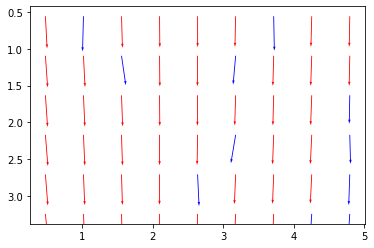

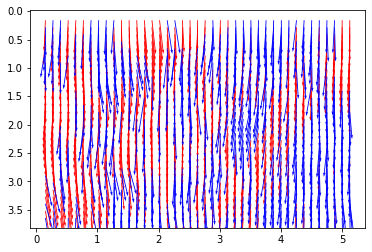

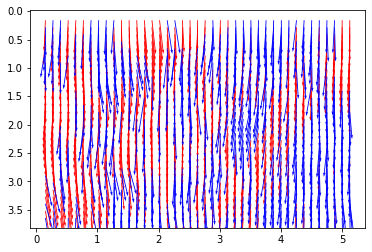

In [6]:
tools.display_vector_field('exp1_001_extended.txt', scale=30, width=0.0025)
tools.display_vector_field('exp1_001_direct.txt', scale=30, width=0.0025)
tools.display_vector_field('exp1_001_fft.txt', scale=30, width=0.0025);